Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_dup = ducplicated address in 2016-2017  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = housing dataset use for vs interest rate  
interest_rate_1617_df = monthly interest rate from 2016-2017

In [14]:
#import .csv file for question 1 (interest rate vs housing price) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import warnings
housing_data_file = Path('Resources/melb_housing_data.csv')
interest_rate_file = Path('Resources/realestate_interest_rate.csv')
housing_data_df = pd.read_csv(housing_data_file, low_memory=False)
interest_rate_df = pd.read_csv(interest_rate_file)


In [15]:
housing_data_df


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [16]:
#Reduced columns in housing dataset
columns_to_use = ['Suburb', 'Address', 'Date', 'Bedroom', 'Price', 'Distance']
housing_data_df_reduced = housing_data_df[columns_to_use]

#dropna in Price of housing dataset
housing_data_df_dropna_price = housing_data_df_reduced.dropna(how='any', subset='Price')
housing_data_df2 = housing_data_df_dropna_price
housing_data_df2.isna().sum()


Suburb         0
Address        0
Date           0
Bedroom     6441
Price          0
Distance       1
dtype: int64

In [17]:
housing_data_df2.dropna(subset=['Distance'], inplace=True)
housing_data_df2


/var/folders/xv/r9v1g26n7c1grskqhcypk8j00000gp/T/ipykernel_7643/3776575720.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Suburb,Address,Date,Bedroom,Price,Distance
1,Airport West,154 Halsey Rd,3/9/2016,3.0,840000.0,13.5
2,Albert Park,105 Kerferd Rd,3/9/2016,2.0,1275000.0,3.3
3,Albert Park,85 Richardson St,3/9/2016,2.0,1455000.0,3.3
5,Alphington,6 Smith St,3/9/2016,3.0,2000000.0,6.4
6,Alphington,5/6 Yarralea St,3/9/2016,3.0,1110000.0,6.4
...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,30/09/2017,3.0,627500.0,22.7
34852,Reservoir,18 Elinda Pl,30/09/2017,3.0,475000.0,12.0
34853,Roxburgh Park,14 Stainsby Cr,30/09/2017,4.0,591000.0,20.6
34855,Springvale South,30 Waddington Cr,30/09/2017,3.0,780500.0,22.2


In [18]:
#finding duplicated Suburb & Address and dropiong them
#housing_data_df2.drop_duplicates(subset=['Suburb', 'Address'], inplace=True)
#housing_data_df2


In [19]:
housing_data_df2

,Suburb,Address,Date,Bedroom,Price,Distance
1,Airport West,154 Halsey Rd,3/9/2016,3.0,840000.0,13.5
2,Albert Park,105 Kerferd Rd,3/9/2016,2.0,1275000.0,3.3
3,Albert Park,85 Richardson St,3/9/2016,2.0,1455000.0,3.3
5,Alphington,6 Smith St,3/9/2016,3.0,2000000.0,6.4
6,Alphington,5/6 Yarralea St,3/9/2016,3.0,1110000.0,6.4
...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,30/09/2017,3.0,627500.0,22.7
34852,Reservoir,18 Elinda Pl,30/09/2017,3.0,475000.0,12.0
34853,Roxburgh Park,14 Stainsby Cr,30/09/2017,4.0,591000.0,20.6
34855,Springvale South,30 Waddington Cr,30/09/2017,3.0,780500.0,22.2


Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_dup = ducplicated address in 2016-2017  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = dataset use for Question 1 (vs interest rate)  
interest_rate_1617_df = monthly interest rate from 2016-2017
housing_data_location = dataset use for Question 2 (vs location)

In [20]:
# Group the data by suburb and calculate the mean price
average_price_df = housing_data_df2.groupby('Suburb')['Price'].mean().reset_index()

# Rename the 'Price' column to 'Average Price'
average_price_df.rename(columns={'Price': 'Average Price'}, inplace=True)

# Format the values in the 'Average Price' column with dollar sign
average_price_df['Average Price'] = average_price_df['Average Price'].map('${:,.2f}'.format)

# Display the new dataframe
average_price_df


,Suburb,Average Price
0,Abbotsford,"$1,033,549.02"
1,Aberfeldie,"$1,307,192.86"
2,Airport West,"$751,364.25"
3,Albanvale,"$536,055.56"
4,Albert Park,"$1,927,650.54"
...,...,...
339,Yallambie,"$820,861.11"
340,Yarra Glen,"$620,000.00"
341,Yarraville,"$991,244.97"
342,croydon,"$730,000.00"


In [21]:
# Group the data by suburb and calculate the mean price and distance
average_price_distance_df = housing_data_df2.groupby('Suburb').agg({'Price': 'mean', 'Distance': 'mean'}).reset_index()

# Rename the columns
average_price_distance_df.rename(columns={'Price': 'Average Price', 'Distance': 'Average Distance'}, inplace=True)

# Format the values in the 'Average Price' column with dollar sign
average_price_distance_df['Average Price'] = average_price_distance_df['Average Price'].map('${:,.2f}'.format)

# Display the new dataframe
average_price_distance_df


,Suburb,Average Price,Average Distance
0,Abbotsford,"$1,033,549.02",2.700980
1,Aberfeldie,"$1,307,192.86",8.300000
2,Airport West,"$751,364.25",11.898675
3,Albanvale,"$536,055.56",14.000000
4,Albert Park,"$1,927,650.54",3.177419
...,...,...,...
339,Yallambie,"$820,861.11",14.233333
340,Yarra Glen,"$620,000.00",31.400000
341,Yarraville,"$991,244.97",6.689200
342,croydon,"$730,000.00",23.000000


In [22]:
import plotly.express as px

# Convert 'Average Price' column to float data type
average_price_distance_df['Average Price'] = average_price_distance_df['Average Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Get the top 10 suburbs based on average price
top_10_suburbs = average_price_distance_df.nlargest(10, 'Average Price')

# Create the interactive bar plot
fig = px.bar(top_10_suburbs, x='Suburb', y='Average Price', title='Top 10 Suburbs by Average Price')
fig.update_layout(xaxis_title='Suburb', yaxis_title='Average Price')

# Show the plot
fig.show()


In [23]:
housing_data_df2

,Suburb,Address,Date,Bedroom,Price,Distance
1,Airport West,154 Halsey Rd,3/9/2016,3.0,840000.0,13.5
2,Albert Park,105 Kerferd Rd,3/9/2016,2.0,1275000.0,3.3
3,Albert Park,85 Richardson St,3/9/2016,2.0,1455000.0,3.3
5,Alphington,6 Smith St,3/9/2016,3.0,2000000.0,6.4
6,Alphington,5/6 Yarralea St,3/9/2016,3.0,1110000.0,6.4
...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,30/09/2017,3.0,627500.0,22.7
34852,Reservoir,18 Elinda Pl,30/09/2017,3.0,475000.0,12.0
34853,Roxburgh Park,14 Stainsby Cr,30/09/2017,4.0,591000.0,20.6
34855,Springvale South,30 Waddington Cr,30/09/2017,3.0,780500.0,22.2


In [24]:
housing_data_df2.dtypes

Suburb       object
Address      object
Date         object
Bedroom     float64
Price       float64
Distance    float64
dtype: object

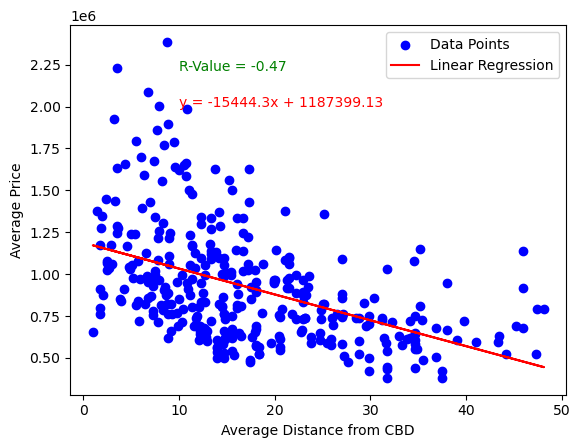

-0.4682299989979414


In [30]:
# Perform linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(average_price_distance_df['Average Distance'], average_price_distance_df['Average Price'])

# Plot the scatter plot
plt.scatter(average_price_distance_df['Average Distance'], average_price_distance_df['Average Price'], color='blue', label='Data Points')

# Plot the linear regression line
regress_values = slope * average_price_distance_df['Average Distance'] + intercept
plt.plot(average_price_distance_df['Average Distance'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
plt.xlabel('Average Distance from CBD')
plt.ylabel('Average Price')
plt.legend()

# Add equation and R-value to the plot
plt.text(10, 2000000, f"y = {round(slope, 2)}x + {round(intercept, 2)}", color='red')
plt.text(10, 2211100, f"R-Value = {round(r_value, 2)}", color='green')

# Display the plot
plt.show()

print(r_value)

#the r value is -0.47, which means there is a negative correlation between the average distance from CBD and the average price of housing. 
# When the average distance from CBD increases, the average price of housing decreases and vis-Versa. 
#from this we can conclude that the closer the housing is to the CBD, the more expensive it is.